In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib as mlp
import pickle
import os
from matplotlib import pyplot as plt
from shutil import copyfile

In [1]:
datafiles=[]
basepath='/data/Images/'
#datafiles.append(basepath+'test_environment')
datafiles.append(basepath+'signs001_manually_labeled')
datafiles.append(basepath+'signs003_manually_labeled')
datafiles.append(basepath+'signs004_manually_labeled')
datafiles.append(basepath+'signs006_bosch_manually_labeled')

datafiles.append(basepath+'VID_20190125_181012')
datafiles.append(basepath+'VID_20190125_181207')
datafiles.append(basepath+'VID_20190125_181313')
datafiles.append(basepath+'VID_20190125_181630')
datafiles.append(basepath+'VID_20190125_181902')

#datafiles.append(basepath+'2019-01-09-13-00-05')
#datafiles.append(basepath+'2019-01-09-13-01-41')
#datafiles.append(basepath+'2019-01-09-13-05-43')
#datafiles.append(basepath+'2019-01-09-13-24-37')
#datafiles.append(basepath+'2019-01-09-13-55-01')
#datafiles.append(basepath+'2019-01-20-15-59-41')
#datafiles.append(basepath+'bosch_2018_16_36')
#datafiles.append(basepath+'bosch_2018_17_08')
#datafiles.append(basepath+'bosch_2018_17_24')
#datafiles.append(basepath+'bosch_2018_17_54')
zerobase=['bosch_2018_16_36','bosch_2018_17_54','bosch_2018_17_24','bosch_2018_17_08','2019-01-09-13-00-05','2019-01-09-13-01-41','2019-01-09-13-05-43','2019-01-09-13-24-37','2019-01-09-13-55-01']
jpglist=['2019-01-20-15-59-41','bosch_2018_17_54','bosch_2018_17_24','bosch_2018_17_08','2019-01-09-13-00-05','2019-01-09-13-01-41','2019-01-09-13-05-43','2019-01-09-13-24-37','2019-01-09-13-55-01']

In [4]:
rewrite=False
#zero_class=sign_name_carolo_trans.get(43)
labelcounter=np.zeros((32,))
for folder in datafiles:
    print(folder)
    folder_blur=folder+'_blur'
    print(folder_blur)
    if not os.path.exists(folder_blur):
        os.makedirs(folder_blur)
        print('did')
        for filename in os.listdir(folder):   
            if filename.endswith('.csv'):
                print(filename)
                copyfile(folder+'/'+filename, folder_blur+'/'+filename)
            elif filename.endswith('.png'):
                #print(filename)
                img = cv2.imread(os.path.join(folder , filename))
                img_blur=motionBlur(img)
                cv2.imwrite(os.path.join(folder_blur , filename), img_blur)
            elif filename.endswith('.jpg'):
                #print(filename)
                img = cv2.imread(os.path.join(folder , filename))
                img_blur=motionBlur(img)
                cv2.imwrite(os.path.join(folder_blur , filename), img_blur)
    if rewrite==True:
        for filename in os.listdir(folder):   
            if filename.endswith('.csv'):
                print(filename)
                copyfile(folder+'/'+filename, folder_blur+'/'+filename)
            elif filename.endswith('.png'):
                #print(filename)
                img = cv2.imread(os.path.join(folder , filename))
                img_blur=motionBlur(img)
                cv2.imwrite(os.path.join(folder_blur , filename), img_blur)

            


/data/Images/signs001_manually_labeled
/data/Images/signs001_manually_labeled_blur
/data/Images/signs003_manually_labeled
/data/Images/signs003_manually_labeled_blur
/data/Images/signs004_manually_labeled
/data/Images/signs004_manually_labeled_blur
/data/Images/signs006_bosch_manually_labeled
/data/Images/signs006_bosch_manually_labeled_blur
/data/Images/VID_20190125_181012
/data/Images/VID_20190125_181012_blur
did
VID_20190125_181012.csv
/data/Images/VID_20190125_181207
/data/Images/VID_20190125_181207_blur
did
VID_20190125_181207.csv
/data/Images/VID_20190125_181313
/data/Images/VID_20190125_181313_blur
did
VID_20190125_181313.csv
/data/Images/VID_20190125_181630
/data/Images/VID_20190125_181630_blur
did
VID_20190125_181630.csv
/data/Images/VID_20190125_181902
/data/Images/VID_20190125_181902_blur
did
VID_20190125_181902.csv


In [ ]:
img = cv2.imread('/data/Images/signs003_manually_labeled/00001.png')
cv2.imshow('Original', img)

size = 8

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# applying the kernel to the input image
output = cv2.filter2D(img, -1, kernel_motion_blur)

cv2.imshow('Motion Blur', output)
cv2.waitKey(0)

In [3]:
def motionBlur(img):
    size = 5

    # generating the kernel
    kernel_motion_blur = np.zeros((size, size))
    kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
    kernel_motion_blur = kernel_motion_blur / size

    # applying the kernel to the input image
    output = cv2.filter2D(img, -1, kernel_motion_blur)
    return output

In [1]:
from skimage import io
from skimage import transform as tf


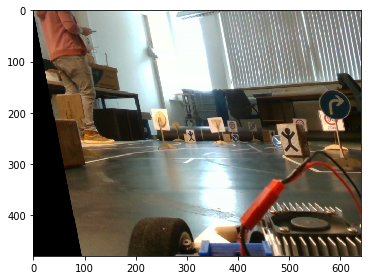

In [7]:
image = io.imread("/data/Images/2019-01-09-13-05-43/frame0003.jpg")

# Create Afine transform
afine_tf = tf.AffineTransform(shear=0.2)

# Apply transform to image data
modified = tf.warp(image, inverse_map=afine_tf)

# Display the result
io.imshow(modified)